### Dominant Color Extraction using Kmeans

### Importing Libraries

In [131]:
import numpy as np 
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.cluster import KMeans
plt.style.use('seaborn')

In [146]:
img=Image.open('tiger.jpg')
W,H=img.size
W,H=W//2,H//2
img=img.resize((W,H)) 
img=np.array(img)
img=np.asarray(img,dtype='int32')
print(img.shape)

(512, 768, 3)


### Visualising Original Image

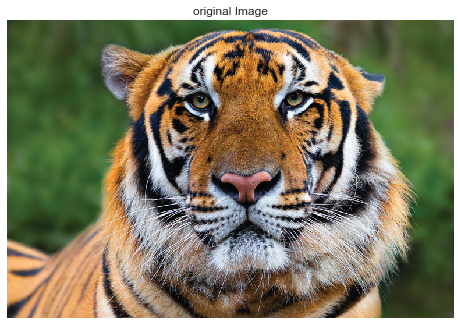

In [147]:
plt.title('original Image')
plt.axis('off')
plt.imshow(img)
plt.show()

In [148]:
img=img.reshape((-1,3))
km=KMeans(n_clusters=5,init='k-means++')
km.fit(img)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [149]:
cluster_centres=np.array(km.cluster_centers_,dtype='int32')

dominance_array=np.array(np.unique(km.labels_, return_counts = True)[1],dtype=np.float32)
dominance_array=dominance_array/img.shape[0]

colors=[]
for i in range(cluster_centres.shape[0]):
    temp_color=np.zeros((100,100,3),dtype='int32')
    temp_color[:,:,:]=cluster_centres[i]
    colors.append(temp_color)
    
print(dominance_array)

[0.15390523 0.13421631 0.17712148 0.39730326 0.13745372]


### Dominant colors

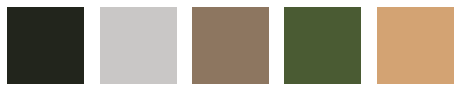

In [150]:
i=1
for c in colors:
    plt.subplot(1,5,i)
    plt.axis('off')
    plt.imshow(c)
    i+=1
plt.show()

### Dominance

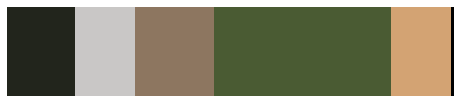

In [151]:
arr = np.zeros((100, 500, 3))
curr = 0
for i in range(cluster_centres.shape[0]):
    width = int(dominance_array[i] * arr.shape[1])
    arr[:, curr:curr+width, :] = cluster_centres[i]
    curr+= width
arr=np.asarray(arr,dtype='int32')
plt.axis('off')
plt.imshow(arr)
plt.show()

### Image after segmentation

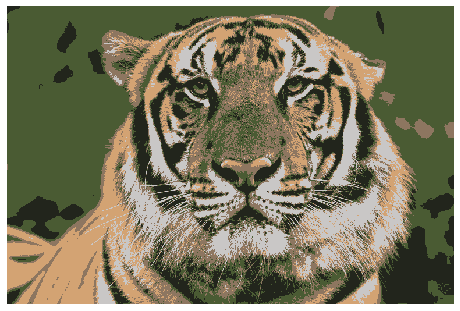

In [152]:
new_img=np.zeros((W*H,3),dtype='int32')
for i in range(new_img.shape[0]):
    new_img[i]=cluster_centres[km.labels_[i]]
new_img=new_img.reshape((H,W,3))
plt.axis('off')
plt.imshow(new_img)
plt.show()